# Lab | Text Generation from Shakespeare's Sonnet

This notebook explores the fascinating domain of text generation using a deep learning model trained on Shakespeare's sonnets. 

The objective is to create a neural network capable of generating text sequences that mimic the style and language of Shakespeare.

By utilizing a Recurrent Neural Network (RNN) with Long Short-Term Memory (LSTM) layers, this project aims to demonstrate how a model can learn and replicate the complex patterns of early modern English. 

The dataset used consists of Shakespeare's sonnets, which are preprocessed and tokenized to serve as input for the model.

Throughout this notebook, you will see the steps taken to prepare the data, build and train the model, and evaluate its performance in generating text. 

This lab provides a hands-on approach to understanding the intricacies of natural language processing (NLP) and the potential of machine learning in creative text generation.

Let's import necessary libraries

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

Let's get the data!

In [15]:
import requests
url = 'https://raw.githubusercontent.com/martin-gorner/tensorflow-rnn-shakespeare/master/shakespeare/sonnets.txt'
resp = requests.get(url)
with open('sonnets.txt', 'wb') as f:
    f.write(resp.content)

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")

Step 1: Initialise a tokenizer and fit it on the corpus variable using .fit_on_texts

In [16]:
# Load the contents of the text file
file_path = './sonnets.txt'

# Read the contents of the file into a variable (corpus)
with open(file_path, 'r') as file:
    corpus = file.read().splitlines()

# Remove any empty lines from the corpus
corpus = [line for line in corpus if line.strip()]

# Display the first few lines to verify
print(corpus[:5])

# Now you can proceed to use 'corpus' for further steps like tokenization or training.


['\tSONNETS', 'TO THE ONLY BEGETTER OF', 'THESE INSUING SONNETS', 'MR. W. H. ALL HAPPINESS', 'AND THAT ETERNITY']


Step 2: Calculate the Vocabulary Size

Let's figure out how many unique words are in your corpus. This will be the size of your vocabulary.

Calculate the length of tokenizer.word_index, add 1 to it and store it in a variable called total_words.

In [17]:
#Your code here:
# Step 1: Tokenize the corpus
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words if needed
tokenizer.fit_on_texts(corpus)

# Step 2: Calculate total_words (vocabulary size)
# Ensure that +1 is added to account for the padding index
total_words = len(tokenizer.word_index) + 1

Create an empty list called input_sequences.

For each sentence in your corpus, convert the text into a sequence of integers using the tokenizer.
Then, generate n-gram sequences from these tokens.

Store the result in the list input_sequences.

In [18]:
# Your code here :
# Step 1: Initialize an empty list to hold the n-gram sequences
input_sequences = []

# Step 2: Loop through each sentence in the corpus
for line in corpus:
    # Convert the sentence into a sequence of integers
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    # Step 3: Generate n-gram sequences for the sentence
    for i in range(1, len(token_list) + 1):
        n_gram_sequence = token_list[:i]
        input_sequences.append(n_gram_sequence)

# Output the generated n-gram sequences
print("N-gram sequences:", input_sequences)


N-gram sequences: [[878], [3], [3, 2], [3, 2, 313], [3, 2, 313, 1375], [3, 2, 313, 1375, 4], [118], [118, 1376], [118, 1376, 878], [1377], [1377, 1378], [1377, 1378, 1379], [1377, 1378, 1379, 23], [1377, 1378, 1379, 23, 1380], [1], [1, 8], [1, 8, 517], [1381], [1381, 30], [126], [126, 186], [126, 186, 278], [126, 186, 278, 635], [126, 186, 278, 635, 1382], [2], [2, 98], [2, 98, 879], [1383], [1383, 7], [1384], [1384, 279], [880], [880, 880], [6], [34], [34, 418], [34, 418, 881], [34, 418, 881, 166], [34, 418, 881, 166, 214], [34, 418, 881, 166, 214, 518], [8], [8, 882], [8, 882, 135], [8, 882, 135, 353], [8, 882, 135, 353, 103], [8, 882, 135, 353, 103, 156], [8, 882, 135, 353, 103, 156, 199], [16], [16, 22], [16, 22, 2], [16, 22, 2, 883], [16, 22, 2, 883, 61], [16, 22, 2, 883, 61, 30], [16, 22, 2, 883, 61, 30, 48], [16, 22, 2, 883, 61, 30, 48, 636], [25], [25, 314], [25, 314, 637], [25, 314, 637, 103], [25, 314, 637, 103, 200], [25, 314, 637, 103, 200, 25], [25, 314, 637, 103, 200, 25,

Calculate the length of the longest sequence in input_sequences. Assign the result to a variable called max_sequence_len.

Now pad the sequences using pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre').
Convert it to a numpy array and assign the result back to our variable called input_sequences.

In [19]:
# Your code here :
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Step 4: Find the maximum sequence length
max_sequence_len = max([len(x) for x in input_sequences])

# Step 5: Pad the sequences
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Step 6: Prepare Predictors and Labels
predictors = input_sequences[:, :-1]
labels = input_sequences[:, -1]

# Output the max sequence length and the shape of input_sequences
print("Max sequence length:", max_sequence_len)
print("Shape of input_sequences:", input_sequences.shape)


Max sequence length: 11
Shape of input_sequences: (17805, 11)


Prepare Predictors and Labels

Split the sequences into two parts:

- Predictors: All elements from input_sequences except the last one.
- Labels: The last element of each sequence in input_sequences.

In [20]:
# Your code here :
# Step 1: Prepare Predictors (all elements except the last one)
predictors = input_sequences[:, :-1]

# Step 2: Prepare Labels (the last element of each sequence)
labels = input_sequences[:, -1]

# Output the shapes of predictors and labels
print("Shape of predictors:", predictors.shape)
print("Shape of labels:", labels.shape)


Shape of predictors: (17805, 10)
Shape of labels: (17805,)


One-Hot Encode the Labels :

Convert the labels (which are integers) into one-hot encoded vectors. 

Ensure the length of these vectors matches the total number of unique words in your vocabulary.

Use ku.to_categorical() on labels with num_classes = total_words

Assign the result back to our variable labels.

In [21]:
# Your code here :
from tensorflow.keras.utils import to_categorical

# Step 1: One-hot encode the labels
labels = to_categorical(labels, num_classes=total_words)

# Output the shape of the one-hot encoded labels
print("Shape of one-hot encoded labels:", labels.shape)


Shape of one-hot encoded labels: (17805, 3375)


# Initialize the Model

Start by creating a Sequential model.

Add Layers to the Model:

Embedding Layer: The first layer is an embedding layer. It converts word indices into dense vectors of fixed size (100 in this case). Set the input length to the maximum sequence length minus one, which corresponds to the number of previous words the model will consider when predicting the next word.

Bidirectional LSTM Layer: Add a Bidirectional LSTM layer with 150 units. This layer allows the model to learn context from both directions (past and future) in the sequence. return_sequences=True

Dropout Layer: Add a dropout layer with a rate of 0.2 to prevent overfitting by randomly setting 20% of the input units to 0 during training.

LSTM Layer: Add a second LSTM layer with 100 units. This layer processes the sequence and passes its output to the next layer.

Dense Layer (Intermediate): Add a dense layer with half the total number of words as units, using ReLU activation. A regularization term (L2) is added to prevent overfitting.

Dense Layer (Output): The final dense layer has as many units as there are words in the vocabulary, with a softmax activation function to output a probability distribution over all words.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2

# Initialize the model
model = Sequential()

# Add an Embedding layer
# Input dimension: total_words, output dimension: 100, input_length: max_sequence_len - 1
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len - 1))

# Add a Bidirectional LSTM layer with 150 units, return_sequences=True
model.add(Bidirectional(LSTM(150, return_sequences=True)))

# Add a Dropout layer with a dropout rate of 0.2
model.add(Dropout(0.2))

# Add a second LSTM layer with 100 units
model.add(LSTM(100))

# Add a Dense layer with half the total words (total_words // 2) and ReLU activation
# Regularization with L2 to prevent overfitting
model.add(Dense(total_words // 2, activation='relu', kernel_regularizer=l2(0.01)))

# Add the final Dense layer with softmax activation to output probabilities
model.add(Dense(total_words, activation='softmax'))




# Compile the Model:

Compile the model using categorical crossentropy as the loss function, the Adam optimizer for efficient training, and accuracy as the metric to evaluate during training.

In [23]:
# Your code here :
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Print Model Summary:

Use model.summary() to print a summary of the model, which shows the layers, their output shapes, and the number of parameters.

In [24]:
# Your code here :
# Output the model summary to inspect the architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Now train the model for 50 epochs and assign it to a variable called history.

Training the model with 50 epochs should get you around 40% accuracy.

You can train the model for as many epochs as you like depending on the time and computing constraints you are facing. Ideally train it for a larger amount of epochs than 50.

That way you will get better text generation at the end.

However, dont waste your time.

In [25]:
# Your code here :
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for 50 epochs
history = model.fit(predictors, labels, epochs=50, verbose=1)




Epoch 1/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 67s 106ms/step - accuracy: 0.0222 - loss: 7.2228
Epoch 2/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 58s 105ms/step - accuracy: 0.0268 - loss: 6.4342
Epoch 3/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 58s 104ms/step - accuracy: 0.0326 - loss: 6.3021
Epoch 4/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 52s 93ms/step - accuracy: 0.0439 - loss: 6.1817
Epoch 5/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 51s 92ms/step - accuracy: 0.0461 - loss: 6.0688
Epoch 6/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 53s 95ms/step - accuracy: 0.0503 - loss: 6.0132
Epoch 7/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 48s 85ms/step - accuracy: 0.0516 - loss: 5.9340
Epoch 8/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 53s 96ms/step - accuracy: 0.0537 - loss: 5.8377
Epoch 9/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 49s 88ms/step - accuracy: 0.0609 - loss: 5.7460
Epoch 10/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 49s 87ms/step - accuracy: 0.0629 - loss: 5.6799
Epoch 11/50
557/557 ━━━━━━━━━━━━━━━━━━━━ 48s 85ms/step - accuracy: 0.0731 - loss: 5.5854
Epoch 12/50
557/557 ━━━━━━━

# Use plt from matplotlib to plot the training accuracy over epochs and the loss over epochs

First you will have to get the accuracy and loss data over epochs, you can do this by using methods on your model.

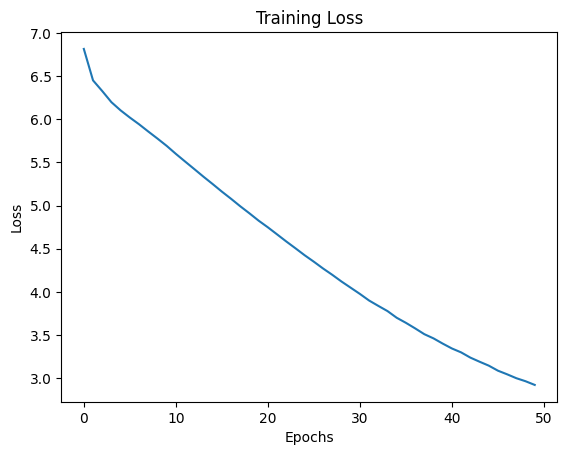

In [26]:
# Your code here :
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Generate text with the model based on a seed text

Now you will create two variables :

- seed_text = 'Write the text you want the model to use as a starting point to generate the next words'
- next_words = number_of_words_you_want_the_model_to_generate

Please change number_of_words_you_want_the_model_to_generate by an actual integer.

In [27]:
# Your code here :
import numpy as np

# Set the seed text and the number of words to generate
seed_text = 'Write the text you want the model to use as a starting point to generate the next words'
next_words = 50  # Change this to the number of words you want to generate

# Function to generate text
for _ in range(next_words):
    # Tokenize the seed text
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Pad the sequence to match the max sequence length
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
    
    # Predict the next word
    predicted = model.predict(token_list, verbose=0)
    
    # Get the index of the predicted word
    predicted_word_index = np.argmax(predicted, axis=-1)
    
    # Get the word from the index
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            output_word = word
            break
    
    # Append the word to the seed text
    seed_text += " " + output_word

# Output the generated text
print(seed_text)


Write the text you want the model to use as a starting point to generate the next words ' eye on thee good hate ' canst you not say thence you dearer age blind stand days still due on me thence thine art me on you back on truth well ' art to go rage spent dote rare spent spent prove thee appear life new prove thee '


Now create a loop that runs based on the next_words variable and generates new text based on your seed_text input string. Print the full text with the generated text at the end.

This time you dont get detailed instructions.

Have fun!

In [28]:
# Set the seed text and the number of words to generate
seed_text = "Once upon a time there was a"
next_words = 50  # Specify how many words to generate

# Loop to generate the text
for _ in range(next_words):
    # Tokenize and pad the seed text
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
    
    # Predict the next word index
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=-1)[0]
    
    # Find the corresponding word
    output_word = [word for word, index in tokenizer.word_index.items() if index == predicted_word_index]
    
    # Add the new word to the seed text
    if output_word:
        seed_text += ' ' + output_word[0]

# Print the final generated text
print("Generated Text:\n", seed_text)


Generated Text:
 Once upon a time there was a several plot pride tell ' set ' grew of state away on men can set thee back on to thee one night ' eye that life ' blind art for thee say good night old night away in thee well young on true night well days still still still prove


Experiment with at least 3 different seed_text strings and see what happens!

In [34]:
# Your code here :
import numpy as np

# Step 1: Define three seed texts
seeds = [
    "Once upon a time, there was Donald Trump",
    "The sun is shining brightly", 
    "In the middle of the night", 
]

# Number of words to generate for each seed
next_words = 50

# Step 2: Loop through each seed text and generate text
for seed_text in seeds:
    print(f"\nSeed: {seed_text}")
    current_seed_text = seed_text  # Make a copy of the seed text for modifications

    # Generate the next set of words
    for _ in range(next_words):
        # Tokenize the seed text
        token_list = tokenizer.texts_to_sequences([current_seed_text])[0]
        
        # Pad the sequence to the max_sequence_len - 1
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        
        # Predict the next word
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=-1)[0]
        
        # Convert the predicted index to the corresponding word
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                output_word = word
                break
        
        # Append the predicted word to the seed text
        current_seed_text += " " + output_word

    # Print the generated text
    print(f"Generated Text:\n{current_seed_text}\n")



Seed: Once upon a time, there was Donald Trump
Generated Text:
Once upon a time, there was Donald Trump they despise twain best spent ride 'will ' dote me do ' ' do me new art so life best ' go age ' stand ' do me well prove thee thee still still due ' prove thee bring mine eye be prove thee life still days ' ' say


Seed: The sun is shining brightly
Generated Text:
The sun is shining brightly dove it pass things strong dream are night to latch eyes back new say so art love new ' hast you still due on me old due ' bring forth thee new die so art not must go night on kings ' ' ' bear many rage ' canst see


Seed: In the middle of the night
Generated Text:
In the middle of the night hath rehearse rehearse rehearse ' tell the spring and say it ' do sing on the ground hour night it bow ' dote go age ' stand can prove old minds to ' do go age ' art on give forth to me bow back so life bring many night

